## ANN model for finding the best parameter for measuring geometric attributes of a location for opening a new restaurant

In [18]:
# as per above logic, build an ANN model with 17 neurons, and 1 output layer with sigmoid function to determine which weight is the best for predicting the survive rate
# use 10 fold cross validation to train the model, and use the average accuracy as the final accuracy
# training datas: C:\Competition\coding-with-git-repo\open-data-hackthon\becky\training-model\prepared-data\training-data
# valid datas: C:\Competition\coding-with-git-repo\open-data-hackthon\becky\training-model\prepared-data\valid-data t
import os
import time
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from keras import optimizers
from keras.models import Sequential #used for model building
from keras.layers import Dense #used for creating layers
from scikeras.wrappers import KerasClassifier #used for scikit learn wrapper
from sklearn.model_selection import StratifiedKFold #Stratified K Fold
from sklearn.model_selection import GridSearchCV #Grid Searching
from sklearn.metrics import confusion_matrix #import confusion matrix
from sklearn.metrics import roc_curve, roc_auc_score #import ROC curve tools
from itertools import product
from sklearn.model_selection import KFold


# function to load the test data
def load_test_data(test_data_path):
    test_data = pd.read_csv(test_data_path)
    # return the 7th and the second last column of the test data
    # return the 7th and the second last column of the test data
    test_data = test_data.iloc[:,7:]
    test_data = test_data.iloc[:,:-1]
    test_data = test_data.fillna(test_data.mean())
    # reset index
    test_data = test_data.reset_index()
    return test_data
  
# function to load the desire output training data
def load_training_data(training_data_path):
    training_data = pd.read_csv(training_data_path)
    training_data = training_data.iloc[:,-1]
    # fill the missing data with the mode of the column
    training_data = training_data.fillna(training_data.mode())
    # reset index
    training_data = training_data.reset_index()
    # drop the index column
    training_data = training_data.iloc[:,-1]
    return training_data

# open the training data folder, in my PC path: C:\Competition\coding-with-git-repo\open-data-hackthon\becky\training-model\prepared-data\master-data\RL.csv
# in my cloud path: '/workspaces/open-data-hackthon/becky/training-model/prepared-data/master-data/RL.csv'
import os
training_data_folder = 'C:\\Competition\\coding-with-git-repo\\open-data-hackthon\\becky\\training-model\\prepared-data\\master-data\\RL.csv'


# function to create the model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
neurons2 = 0
learn_rate2 = 0
decay2 = 0
momentum2 = 0
nesterov2 = True
epochs2 = 0
counterx = 1

def ANN_model(neurons, learn_rate, decay, momentum, nesterov, init, epochs, IV):
    global neurons2, learn_rate2, decay2, momentum2
    global nesterov2, epochs2, counterx
    if((neurons != neurons2) or (learn_rate != learn_rate2) or
        (decay != decay2) or (momentum != momentum2) or
        (nesterov != nesterov2) or (epochs != epochs2)):
        if counterx <= testcomblen:
            print(counterx, "of", testcomblen, '\t',
            "Neurons:", neurons,
            "-- Learn Rate:", learn_rate,
            "-- Decay:", decay,
            "-- Momentum:", momentum,
            "-- Nesterov:", nesterov,
            "-- Epochs:", epochs)
        # create model
        model = Sequential()
        # add hidden layer
        model.add(Dense(neurons,kernel_initializer = init,use_bias = False, activation = 'relu',input_dim=IV))
        # add output layer
        model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
        # compile optimizer
        optimizer = optimizers.SGD(lr=learn_rate, decay=decay, momentum=momentum, nesterov=nesterov)
        # compile model
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model

# function to train the model
if __name__ == "__main__":
    tempmean = []
    tempstd = []
    IV = []
    training_data = load_test_data(training_data_folder)
    training_data_output = load_training_data(training_data_folder)
    # directory to save the best parameters for the model is 'model-training-result'
    # if the directory does not exist, then create the directory
    desktop = 'model-training-result'
    if not os.path.exists('model-training-result'):
        os.makedirs('model-training-result')
    # file paths for saving the best parameters for the model
    final_model_params = desktop + "\\final_model_params.json"
    final_model_json = desktop + "\\final_model_json.json"
    final_model_weights = desktop + "\\final_model_weights.h5"
    final_model_complete = desktop + "\\final_model_complete.h5"
    final_model_layer_1_weights = desktop + "\\final_model_layer_1_weights.csv"
    final_model_layer_2_weights = desktop + "\\final_model_layer_2_weights.csv"
    final_model_mean_stdev = desktop + "\\final_model_mean_stdev.csv"
    final_model_probabilities = desktop + "\\final_model_probabilities.csv"
    
    # get column headings
    column_headings = list(training_data.columns.values)
    # get mean and standard deviation of each column
    tempmean.clear()
    tempstd.clear()
    for i in column_headings:
        tempmean.append(training_data[i].mean())
        tempstd.append(training_data[i].std())
    # standardize the data
    d = {'Column Headings': column_headings, 'Mean': tempmean, 'Standard Deviation': tempstd}
    Mean_Stdev = pd.DataFrame(d)
    
    # number of independent variables
    num_X = training_data.shape[1]
    IV.append(num_X)
    
    #get start time
    start_time = time.time()
    
    #Find ideal parameters
    estimator = KerasClassifier(model = ANN_model,
                                init = 'glorot_uniform', nesterov = [True, False], neurons = [24, 12, 25, 49],
                                learn_rate = [0.1, 0.01, 0.001, 0.005], momentum = [0.1, 0.5, 0.9, 0.99],
                                decay = [0.0, 0.1, 0.01, 0.001], epochs = [1, 10, 50, 100, 500], IV = 18, verbose = 0)
    
    init = ['glorot_uniform']
    nesterov = [True, False]
    neurons = [24, 12, 25, 49]
    learn_rate = [0.1, 0.01, 0.001, 0.005]
    momentum = [0.1, 0.5, 0.9, 0.99]
    decay = [0.0, 0.1, 0.01, 0.001]
    epochs = [1, 10, 50, 100, 500]
    
    #Find the number of different combinations
    testcomb = product(neurons, learn_rate, momentum, nesterov, decay, epochs)
    testcomblen = len(list(testcomb))
    
    print("Running Stratified K Fold Testing...")
    param_grid = dict(
    neurons = neurons, 
    decay = decay, 
    learn_rate = learn_rate, 
    momentum = momentum, 
    nesterov = nesterov, 
    epochs = epochs, 
    init = init, 
    IV = IV)
    SKfold= KFold(n_splits=5, shuffle= True)
    
    #cv cross-validation generator to use a 10x StatifiedKFold
    grid = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    cv = SKfold
    )
    
    #Find the data to the model
    grid_result = grid.fit(X = training_data, y = training_data_output)
    
    ##Get finished time
    finish_time = time.time()
    total_time = finish_time - start_time
    minutes, seconds = divmod(total_time, 60)
    hours, minutes = divmod(minutes, 60)
    days, hours = divmod(hours, 24)
    print("\n" + "Finished in %.0f" %days + " days %.0f" %hours + 
    " hours %.0f" %minutes + " minutes %.0f" %seconds + " seconds")
    
    print(
    "\n" + 
    "Best Parameter Accuracy: %.2f%%" %(grid_result.best_score_ * 100)
    )
    bp_dict = grid_result.best_params_
    bp_init = bp_dict["init"]
    bp_neurons = bp_dict["neurons"]
    bp_learn_rate = bp_dict["learn_rate"]
    bp_momentum = bp_dict["momentum"]
    bp_decay = bp_dict["decay"]
    bp_nesterov = bp_dict["nesterov"]
    bp_epochs = bp_dict["epochs"]
    bp_IV = num_X
    
    print("\n" + "Top Parameters For Final Model:")
    print(" Neurons" + '\t' + ": " + str(bp_neurons))
    print(" Learn Rate" + '\t' + ": " + str(bp_learn_rate))
    print(" Momentum" + '\t' + ": " + str(bp_momentum))
    print(" Decay" + '\t' + '\t' + ": " + str(bp_decay))
    print(" Nesterov" + '\t' + ": " + str(bp_nesterov))
    print(" Epochs" + '\t' + ": " + str(bp_epochs))
    
    ##Set final model parameters based on testing and run model
    sk_params = {
    'init': bp_init,
    'epochs': bp_epochs, 
    'neurons': bp_neurons, 
    'learn_rate': bp_learn_rate, 
    'decay': bp_decay, 
    'momentum':bp_momentum, 
    'nesterov':bp_nesterov, 
    'IV':bp_IV
    }
    #Set the parameters based off of the best found
    final_estimator = KerasClassifier(
    build_fn = ANN_model, 
    **sk_params, 
    verbose = 0
    )
    #Fit the final model based off of the training_data and training_data_output
    history = final_estimator.fit(training_data, training_data_output)
    scores = final_estimator.model.evaluate(training_data, training_data_output, verbose = 0)
    ##Get the final weights used
    #place weights in numpy array
    weights_layer_1 = final_estimator.model.layers[0].get_weights()[0] 
    weights_layer_2 = final_estimator.model.layers[1].get_weights()[0]
    #convert numpy array to DataFrame
    weights_layer_1 = pd.DataFrame(weights_layer_1) 
    weights_layer_2 = pd.DataFrame(weights_layer_2)
    ##Get the actual scores of the model and the classes
    #actual predicted scores of the DV based on the IV
    pred_actual = final_estimator.model.predict(training_data) 
    #place predicted results in a DataFrame
    pred_actual = pd.DataFrame(pred_actual, columns=['Predicted Probability']) 
    #classes of the predicted scores of the DV based on the IV
    pred_class = final_estimator.model.predict_classes(training_data) 
    #place predicted results in a DataFrame
    pred_class = pd.DataFrame(pred_class) 
    print("\n" + "Model Evaluation: %.2f%%" % (scores[1]*100))

    ##Save files
    #JSON files
    b_file = open(final_model_param, "w")
    
    json.dump(sk_params, b_file)
    b_file.close()
    final_json = final_estimator.model.to_json()
    with open(final_model_json, "w") as json_file:
        json_file.write(final_json)
    #H5 files
    final_estimator.model.save_weights(final_model_weight)
    final_estimator.model.save(final_model_complete)
    #CSV files
    weights_layer_1.to_csv(final_model_layer_1_weights, index = False)
    weights_layer_2.to_csv(final_model_layer_2_weights, index = False)
    Mean_Stdev.to_csv(final_model_mean_stdev, index = False)
    pred_actual.to_csv(final_model_probabilities, index = False)
    print("\n" + "Saved 8 files." + "\n") 
    ##Calculate AIC & BIC
    n = len(training_data_output)
    k = IV[0] * bp_neurons + bp_neurons
    y2 = pred_actual.T.squeeze()
    LogL = sum(training_data_output * np.log(y2) + (1 - training_data_output) * np.log(1 - y2))
    AIC = -2 * (LogL - k)
    BIC = -2 * LogL + np.log(n) * k
    print("AIC:", AIC)
    print("BIC:", BIC, "\n")
    ##Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(training_data_output, pred_class).ravel()
    print("Confusion Matrix")
    print("\t", "\t", "Predicted")
    print("\t", "\t", "0", "\t", "1", "\t", "Total")
    print("Actual", "\t", "0", "\t", tn, "\t", fp, "\t", tn+fp)
    print("\t", "1", "\t", fn, "\t", tp, "\t", fn+tp)
    print("\t", "Total", "\t", tn+fn, "\t", fp+tp)
    ##Calculate the AUROC score
    auc = roc_auc_score(training_data_output, pred_actual)
    print('\n' + "AUC: %.6f" %auc)
    
    ##Create ROC curve
    FPR, TPR, _ = roc_curve(training_data_output, pred_actual) #get the rates for the curve
    figure(num=1, figsize=(7, 7), edgecolor = 'w')
    plt.plot(FPR, TPR, marker='.', ms=0.05, color='r')
    plt.plot([0,1], [0,1], '--', color='black') #create a diagonal dashed line
    plt.title('Artificial Neural Network - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()



Running Stratified K Fold Testing...


ValueError: 
All the 12800 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kwokt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: ANN_model() missing 1 required positional argument: 'epochs'



AUC: 0.623113


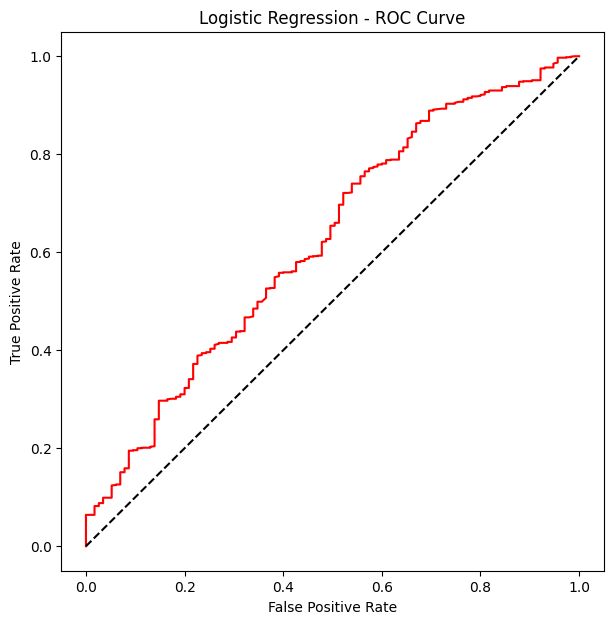

In [1]:
# find the best weighting for generating the best prediction using logistic regression
# import the necessary libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# function to load the test data
def load_test_data(test_data_path):
    test_data = pd.read_csv(test_data_path)
    # return the 7th and the second last column of the test data
    test_data = test_data.iloc[:,7:]
    test_data = test_data.iloc[:,:-1]
    # scale the data with robust scaler, no negative value
    test_data_norm = preprocessing.StandardScaler().fit_transform(test_data)
    # convert the test_data_norm into its absolute value
    test_data = pd.DataFrame(test_data_norm, columns = test_data.columns)
    # # fill in the missing data with the mean of the column
    test_data = test_data.fillna(test_data.mean())
    return test_data
  
# function to load the desire output training data
def load_output_data(training_data_path):
    training_data = pd.read_csv(training_data_path)
    training_data = training_data.iloc[:,-1]
    # fill the missing data with the mode of the column
    training_data = training_data.fillna(training_data.mode())
    # reset index
    training_data = training_data.reset_index()
    # drop the index column
    training_data = training_data.drop(columns = ['index'])
    return training_data

# read the training data
training_data_folder = 'C:\\Competition\\coding-with-git-repo\\open-data-hackthon\\becky\\training-model\\prepared-data\\master-data\\RL.csv'
training_data = load_test_data(training_data_folder)
output_data = load_output_data(training_data_folder)

X_train, X_test, y_train, y_test = train_test_split(training_data, output_data, test_size=0.2, random_state=12)

# find optimal model for generating the best prediction of the survive rate, for example, if column 1 * -0.5, column 2 * 0.3 etc, then summing the result each column in a row
res2 = sm.GLM(output_data, training_data, family=sm.families.Binomial()).fit_regularized(alpha=0.2, L1_wt=0.0)

# export the parameter to C:\Competition\coding-with-git-repo\open-data-hackthon\becky\training-model\model-training-result
desktop = 'C:\\Competition\\coding-with-git-repo\\open-data-hackthon\\becky\\training-model\\model-training-result'
param = res2.params
param.to_csv(desktop + '\\param_RL_non_scale.csv')

# generate plot for the ROC curve
# generate the prediction using the optimal model
pred = res2.predict(training_data)
# calculate the AUC score
auc = roc_auc_score(output_data, pred)
print('\n' + "AUC: %.6f" %auc)
# generate the ROC curve
FPR, TPR, _ = roc_curve(output_data, pred) #get the rates for the curve
figure(num=1, figsize=(7, 7), edgecolor = 'w')
plt.plot(FPR, TPR, marker='.', ms=0.05, color='r')
plt.plot([0,1], [0,1], '--', color='black') #create a diagonal dashed line
plt.title('Logistic Regression - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


AUC: 0.525191


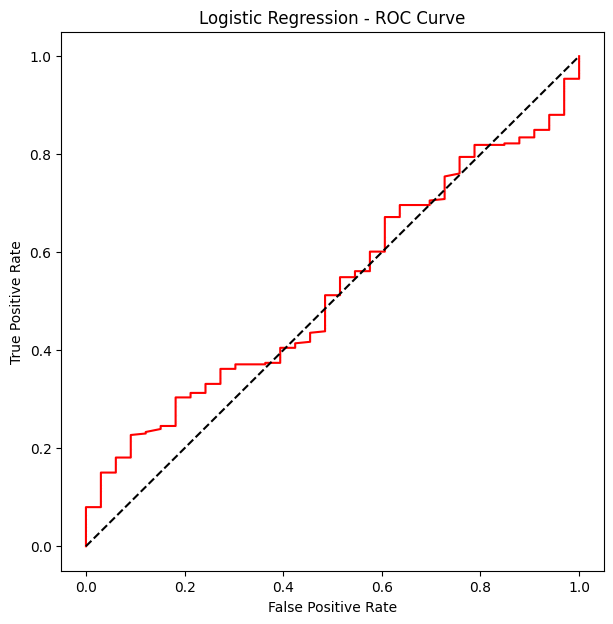

In [2]:
# use above parameter to generate the prediction for file C:\Competition\coding-with-git-repo\open-data-hackthon\becky\training-model\prepared-data\master-data\RR.csv
# read the test data
test_data_folder = 'C:\\Competition\\coding-with-git-repo\\open-data-hackthon\\becky\\training-model\\prepared-data\\master-data\\RR.csv'
test_data = load_test_data(test_data_folder)
output_data = load_output_data(test_data_folder)

X_train, X_test, y_train, y_test = train_test_split(test_data, output_data, test_size=0.2, random_state=12)

res3 = sm.GLM(output_data, test_data, family=sm.families.Binomial()).fit_regularized(alpha=0.2, L1_wt=0.0)

# export the parameter to C:\Competition\coding-with-git-repo\open-data-hackthon\becky\training-model\model-training-result
desktop = 'C:\\Competition\\coding-with-git-repo\\open-data-hackthon\\becky\\training-model\\model-training-result'
param = res3.params
param.to_csv(desktop + '\\param_RR_non_scale.csv')

# generate plot for the ROC curve
# generate the prediction using the optimal model
pred = res3.predict(test_data)
# calculate the AUC score
auc = roc_auc_score(output_data, pred)
print('\n' + "AUC: %.6f" %auc)
# generate the ROC curve
FPR, TPR, _ = roc_curve(output_data, pred) #get the rates for the curve
figure(num=1, figsize=(7, 7), edgecolor = 'w')
plt.plot(FPR, TPR, marker='.', ms=0.05, color='r')
plt.plot([0,1], [0,1], '--', color='black') #create a diagonal dashed line
plt.title('Logistic Regression - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()